#System version

In [1]:
!python --version

Python 3.11.11


In [2]:
import sys
sys.version


'3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]'

In [3]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [4]:
!pip show pip

Name: pip
Version: 25.0.1
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: 
Author-email: The pip developers <distutils-sig@python.org>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: fastai


In [5]:
import sys

if sys.version_info.major == 3 and sys.version_info.minor >=10 and sys.version_info.micro == 11:
  print("correct python version")
else:
  print("please use python version 3.10.11 and sbove colab")



correct python version


## importing book

In [6]:
!pip install numpy==2.0.2
!pip install pandas
!pip install matplotlib

In [7]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt


In [8]:
import requests

url = 'https://www.gutenberg.org/files/244/244-0.txt'
response = requests.get(url)

# givngencoding
response.encoding = 'utf-8'

# Check if the request was successful
if response.status_code == 200:
    # Get the book text from the response
    raw_book_text = response.text

    # Indent the with block correctly under the if statement
    with open(file='raw_book.txt', mode='w', encoding='utf-8') as f: # Fixed the file name to be a string. The 'w' should also be a string.
        print('book downloaded')
        print("Book text fetched successfully!")
        f.write(raw_book_text) # added the file write
else:
    print("Failed to fetch book text.")
raw_book_text = response.text

book downloaded
Book text fetched successfully!


In [9]:
pip show requests

Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, blosc2, CacheControl, community, diffusers, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, google-genai, googledrivedownloader, huggingface-hub, kaggle, kagglehub, langchain, langsmith, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, requests-toolbelt, spacy, spanner-graph-notebook, Sphinx, tensorflow, tensorflow-datasets, transformers, tweepy, wandb, weasel, yfinance


In [10]:
raw_book_text[:1000]

'\ufeffThe Project Gutenberg eBook of A Study In Scarlet, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Study In Scarlet\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: April, 1995 [eBook #244]\r\n[Most recently updated: April 18, 2023]\r\n\r\nLanguage: English\r\n\r\nProduced by: Roger Squires and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I.

## stripping content of book between start and end
### means removing header footer metadata

In [11]:

#def remove_header_footer_metadata():
start_marker="*** START OF THE PROJECT GUTENBERG EBOOK"
end_marker="*** END OF THE PROJECT GUTENBERG EBOOK"

start_index=raw_book_text.find(start_marker)+len(start_marker)

end_index=raw_book_text.find(end_marker)

cleaned_text=raw_book_text[start_index:end_index].strip()

print('remove metadata header and footer')


remove metadata header and footer


In [12]:
cleaned_text[:1000]

'A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I. MR. SHERLOCK HOLMES.\r\n CHAPTER II. THE SCIENCE OF DEDUCTION.\r\n CHAPTER III. THE LAURISTON GARDENS MYSTERY\r\n CHAPTER IV. WHAT JOHN RANCE HAD TO TELL.\r\n CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR.\r\n CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO.\r\n CHAPTER VII. LIGHT IN THE DARKNESS.\r\n\r\n PART II. THE COUNTRY OF THE SAINTS\r\n CHAPTER I. ON THE GREAT ALKALI PLAIN.\r\n CHAPTER II. THE FLOWER OF UTAH.\r\n CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET.\r\n CHAPTER IV. A FLIGHT FOR LIFE.\r\n CHAPTER V. THE AVENGING ANGELS.\r\n CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D.\r\n CHAPTER VII. THE CONCLUSION.\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET.\r\n\r\n\r\n\r\n\r\nPART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical De

## removing extra spaces , non ascii characters  and spcial characters

In [13]:
import re

# Remove extra spaces, special symbols, and non-ASCII characters
# Replace multiple spaces with a single space
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
# Remove non-ASCII characters
cleaned_text = re.sub(r'[^\x00-\x7F]+', ' ', cleaned_text)
# Remove special symbols except basic punctuation
cleaned_text = re.sub(r'[^\w\s.,!?]', '', cleaned_text)

print("Unwanted characters removed!")

Unwanted characters removed!


In [14]:
cleaned_text[:1000]


'A STUDY IN SCARLET  A STUDY IN SCARLET By A. Conan Doyle CONTENTS A STUDY IN SCARLET. PART I. CHAPTER I. MR. SHERLOCK HOLMES. CHAPTER II. THE SCIENCE OF DEDUCTION. CHAPTER III. THE LAURISTON GARDENS MYSTERY CHAPTER IV. WHAT JOHN RANCE HAD TO TELL. CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR. CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO. CHAPTER VII. LIGHT IN THE DARKNESS. PART II. THE COUNTRY OF THE SAINTS CHAPTER I. ON THE GREAT ALKALI PLAIN. CHAPTER II. THE FLOWER OF UTAH. CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET. CHAPTER IV. A FLIGHT FOR LIFE. CHAPTER V. THE AVENGING ANGELS. CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D. CHAPTER VII. THE CONCLUSION. A STUDY IN SCARLET. PART I. _Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D., _Late of the Army Medical Department._ CHAPTER I. MR. SHERLOCK HOLMES. In the year 1878 I took my degree of Doctor of Medicine of the University of London, and proceeded to Netley to go through the course pres

In [15]:
#in lower
cleaned_text=cleaned_text.lower()

In [16]:
cleaned_text[:1000]

'a study in scarlet  a study in scarlet by a. conan doyle contents a study in scarlet. part i. chapter i. mr. sherlock holmes. chapter ii. the science of deduction. chapter iii. the lauriston gardens mystery chapter iv. what john rance had to tell. chapter v. our advertisement brings a visitor. chapter vi. tobias gregson shows what he can do. chapter vii. light in the darkness. part ii. the country of the saints chapter i. on the great alkali plain. chapter ii. the flower of utah. chapter iii. john ferrier talks with the prophet. chapter iv. a flight for life. chapter v. the avenging angels. chapter vi. a continuation of the reminiscences of john watson, m.d. chapter vii. the conclusion. a study in scarlet. part i. _being a reprint from the reminiscences of_ john h. watson, m.d., _late of the army medical department._ chapter i. mr. sherlock holmes. in the year 1878 i took my degree of doctor of medicine of the university of london, and proceeded to netley to go through the course pres

In [17]:
with open(file='cleaned_text_book.txt', mode='w', encoding='utf-8') as f: # Fixed the file name to be a string. The 'w' should also be a string.
    print('clean book downloaded')

    f.write(cleaned_text) # added the file write

clean book downloaded


In [18]:
only_text=cleaned_text[861:]


In [19]:
only_text

'in the year 1878 i took my degree of doctor of medicine of the university of london, and proceeded to netley to go through the course prescribed for surgeons in the army. having completed my studies there, i was duly attached to the fifth northumberland fusiliers as assistant surgeon. the regiment was stationed in india at the time, and before i could join it, the second afghan war had broken out. on landing at bombay, i learned that my corps had advanced through the passes, and was already deep in the enemy s country. i followed, however, with many other officers who were in the same situation as myself, and succeeded in reaching candahar in safety, where i found my regiment, and at once entered upon my new duties. the campaign brought honours and promotion to many, but for me it had nothing but misfortune and disaster. i was removed from my brigade and attached to the berkshires, with whom i served at the fatal battle of maiwand. there i was struck on the shoulder by a jezail bullet

In [20]:
with open(file='only_book_text_content.txt',mode='w',encoding='utf-8')as f:
  print('only_book_text_content.txt is generated')
  # added the file write
  f.write(only_text)

only_book_text_content.txt is generated


## stopwords removal

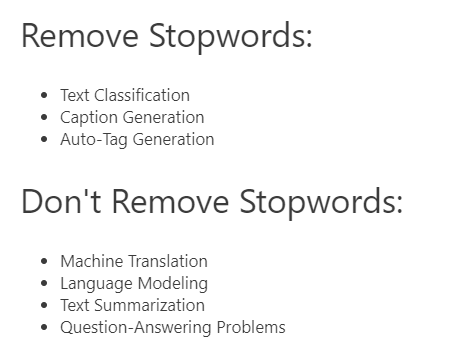

## wordcloud

In [21]:
!pip install wordcloud

In [22]:
pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [23]:
from wordcloud import WordCloud

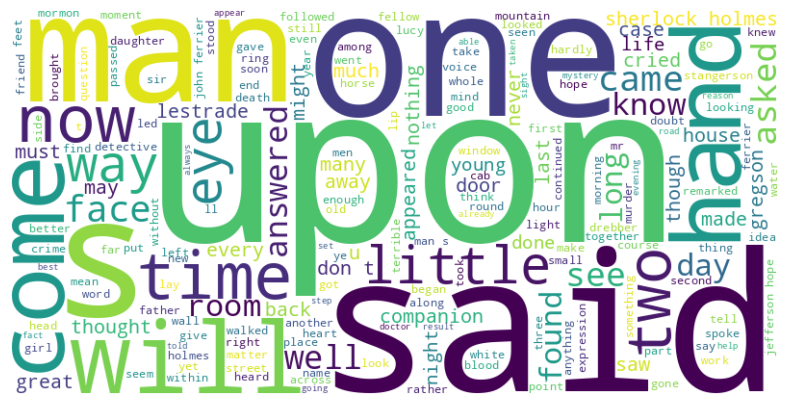

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## preforming booknlp


## nlp pipline used to process long txt like books

## **using booknlp**

#### to use booknlp we have to install java it is a requirement

In [25]:
#installing java
!apt-get update
!apt-get install -y openjdk-11-jdk
!update-alternatives --set java /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

# Verify Java installation
!java -version

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,692 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,237 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pac

In [26]:
!javac -version

javac 11.0.26


In [27]:
# Install dependencies
!git clone https://github.com/booknlp/booknlp.git
%cd booknlp
#download all thingsthat all listed in setup.py
#dowload all requriments in editable files and . represent present working directory
!pip install -e .


Cloning into 'booknlp'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 75 (delta 12), reused 6 (delta 6), pack-reused 50 (from 1)
Receiving objects: 100% (75/75), 7.60 MiB | 11.42 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/booknlp
Obtaining file:///content/booknlp
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━

In [28]:
# Install BookNLP and its dependencies

!pip install "booknlp==1.0.7"


In [31]:
!pip show booknlp

Name: booknlp
Version: 1.0.7
Summary: 
Home-page: https://github.com/dbamman/book-nlp
Author: David Bamman
Author-email: dbamman@berkeley.edu
License: MIT
Location: /content/booknlp
Editable project location: /content/booknlp
Requires: spacy, tensorflow, torch, transformers
Required-by: 


In [29]:
# !python -m spacy download en_core_web_sm

In [30]:
pip show spacy

Name: spacy
Version: 3.8.4
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: booknlp, fastai


In [32]:
import booknlp
import os

os.chdir("/content/booknlp")

print(booknlp.__file__)  # This gives the package location

/content/booknlp/booknlp/__init__.py


## code error fixing for booknlp library

In [33]:

os.chdir("/content/")


!wget https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/booknlp_libary_updated_files.zip

--2025-03-23 13:38:29--  https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/booknlp_libary_updated_files.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/booknlp_libary_updated_files.zip [following]
--2025-03-23 13:38:29--  https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/booknlp_libary_updated_files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7625 (7.4K) [application/zip]
Saving to: ‘booknlp_libary_updated_files.zip’

booknlp_libary_upda 100%[============

In [34]:
#vereify file
!file booknlp_libary_updated_files.zip
!ls -lh booknlp_libary_updated_files.zip

booknlp_libary_updated_files.zip: Zip archive data, at least v1.0 to extract, compression method=store
-rw-r--r-- 1 root root 7.5K Mar 23 13:38 booknlp_libary_updated_files.zip


In [35]:

#unzip
from zipfile import ZipFile
zip_ref=ZipFile(r"/content/booknlp_libary_updated_files.zip")
zip_ref.extractall()
zip_ref.close()


In [36]:


import os


for root, dirs, files in os.walk('/content/files_update_for_booknlp_library'):
  for dir_name in dirs:
    print(os.path.join(root, dir_name))
  for file_name in files:
    print(os.path.join(root, file_name))





/content/files_update_for_booknlp_library/litbank_coref.py
/content/files_update_for_booknlp_library/bert_qa.py
/content/files_update_for_booknlp_library/entity_tagger.py
/content/files_update_for_booknlp_library/entity_cat.tagset


In [37]:
import pathlib# p is small

data_dir=pathlib.Path("/content/files_update_for_booknlp_library/")

file_names=[class_names.name for class_names in data_dir.glob('*')]
file_names

['litbank_coref.py', 'bert_qa.py', 'entity_tagger.py', 'entity_cat.tagset']

In [38]:
import shutil
import os

# Define the source files
source_files = [
    "/content/files_update_for_booknlp_library/litbank_coref.py",
    "/content/files_update_for_booknlp_library/bert_qa.py",
    "/content/files_update_for_booknlp_library/entity_tagger.py",
    "/content/files_update_for_booknlp_library/entity_cat.tagset"
]

destination = "/content/booknlp/booknlp/english/"  #  path


os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

updating library files /content/files_update_for_booknlp_library/litbank_coref.py to /content/booknlp/booknlp/english/
updating library files /content/files_update_for_booknlp_library/bert_qa.py to /content/booknlp/booknlp/english/
updating library files /content/files_update_for_booknlp_library/entity_tagger.py to /content/booknlp/booknlp/english/
updating library files /content/files_update_for_booknlp_library/entity_cat.tagset to /content/booknlp/booknlp/english/


In [39]:
!ls /content

booknlp				  files_update_for_booknlp_library  sample_data
booknlp_libary_updated_files.zip  only_book_text_content.txt
cleaned_text_book.txt		  raw_book.txt


In [40]:
os.chdir("/content/booknlp/")

# importing booknlp class

from booknlp.booknlp import BookNLP

model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
    "book_id" : "a_scarlet_study"
	}



/content/booknlp/booknlp/booknlp.py:50: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if __name__ is "__main__":


using device cpu


In [41]:
booknlp=BookNLP("en",model_params=model_params)

# Input and output paths
input_file = "/content/only_book_text_content.txt"  # Adjust the path if your file is in a different directory
output_dir = "/content/booknlp/booknlp_output"  # Output will be saved in the working directory
book_id = "a_scarlet_study"  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")


{'pipeline': 'entity,quote,supersense,event,coref', 'model': 'big', 'book_id': 'a_scarlet_study'}
downloading entities_google_bert_uncased_L-6_H-768_A-12-v1.0.model
downloading coref_google_bert_uncased_L-12_H-768_A-12-v1.0.model
downloading speaker_google_bert_uncased_L-12_H-768_A-12-v1.0.1.model


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/270M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

--- startup: 58.295 seconds ---
Input file: /content/only_book_text_content.txt
Output directory: /content/booknlp/booknlp_output
Book ID: a_scarlet_study


## **18-20 min processing**

In [42]:
%%time

# Process the book
booknlp.process(input_file, output_dir,book_id)

--- spacy: 8.219 seconds ---
--- entities: 192.943 seconds ---
--- quotes: 0.044 seconds ---
--- attribution: 0.009 seconds ---
--- name coref: 0.047 seconds ---
--- coref: 239.783 seconds ---
--- TOTAL (excl. startup): 441.222 seconds ---, 49522 words
CPU times: user 6min 33s, sys: 37.7 s, total: 7min 11s
Wall time: 7min 21s


In [43]:

# List output files
import os
print(os.listdir(output_dir))

['a_scarlet_study.book', 'a_scarlet_study.supersense', 'a_scarlet_study.entities', 'a_scarlet_study.quotes', 'a_scarlet_study.tokens', 'a_scarlet_study.book.html']


## The output from the BookNLP pipeline is three types of files:


1.   TSV files (.tokens, .entities, .quotes, .supersense),
2.   JSON file (.book)
3.   HTML file (.book.html)


## **download the output files**

In [44]:
from google.colab import files
files.download('/content/raw_book.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
from google.colab import files
files.download('/content/cleaned_text_book.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
from google.colab import files
files.download('/content/only_book_text_content.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Zipping the booknlp_output folder**

### !zip -r file_name.zip "foldername"

###   -r standsfor recursive

In [50]:
!zip -r booknlp_output.zip '/content/booknlp/booknlp_output'

  adding: content/booknlp/booknlp_output/ (stored 0%)
  adding: content/booknlp/booknlp_output/a_scarlet_study.book (deflated 83%)
  adding: content/booknlp/booknlp_output/a_scarlet_study.supersense (deflated 70%)
  adding: content/booknlp/booknlp_output/a_scarlet_study.entities (deflated 71%)
  adding: content/booknlp/booknlp_output/a_scarlet_study.quotes (deflated 35%)
  adding: content/booknlp/booknlp_output/a_scarlet_study.tokens (deflated 70%)
  adding: content/booknlp/booknlp_output/a_scarlet_study.book.html (deflated 87%)


In [51]:
from google.colab import files
files.download('booknlp_output.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **creating dataframe**

In [54]:
df_entities = pd.read_csv("/content/booknlp/booknlp_output/a_scarlet_study.entities", delimiter="\t")
df_entities

,COREF,start_token,end_token,prop,cat,text
0,0,4,4,PRON,PER,i
1,0,6,6,PRON,PER,my
2,76,13,16,NOM,FAC,the university of london
3,77,29,32,NOM,PER,surgeons in the army
4,78,31,32,NOM,ORG,the army
...,...,...,...,...,...,...
7292,2386,49482,49483,NOM,PER,the public
7293,2404,49491,49491,PRON,PER,you
7294,2404,49494,49494,PRON,PER,yourself
7295,2407,49503,49506,NOM,PER,the roman miser populus


In [56]:
df_supersense = pd.read_csv('/content/booknlp/booknlp_output/a_scarlet_study.supersense', delimiter="\t")
df_supersense

,start_token,end_token,supersense_category,text
0,2,2,noun.time,year
1,5,5,verb.social,took
2,7,11,noun.communication,degree of doctor of medicine
3,14,14,noun.artifact,university
4,16,16,noun.artifact,london
...,...,...,...,...
14481,49493,49493,verb.change,make
14482,49498,49498,noun.cognition,consciousness
14483,49500,49500,noun.event,success
14484,49505,49506,noun.person,miser populus


## **huggingface**

In [58]:
!pip install huggingface_hub --quiet

In [59]:
import huggingface_hub

huggingface_hub.login()

In [60]:
from google.colab import userdata

HF_TOKEN=userdata.get('HF_TOKEN')


In [61]:
!pip install "datasets<=2.1.0" #Downgrade to a compatible version
import datasets


In [64]:
try:
    import random
    import torch
    import evaluate
    import accelerate
    import transformers
    import gradio as gr

except ModuleNotFoundError:
  !pip install -U evaluate accelerate gradio
  !pip install "transformer==4.49.0"

print(f'[INFO] torch version {torch.__version__}')

print(f'[INFO] datasets version {datasets.__version__}')


[INFO] torch version 2.6.0+cu124
[INFO] datasets version 2.1.0


In [65]:
pip show torch datasets evaluate accelerate transformers gradio


Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, booknlp, fastai, peft, sentence-transformers, timm, torchaudio, torchvision
---
Name: datasets
Version: 2.1.0
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /usr/local/lib/pyt

In [66]:
from transformers import AutoTokenizer

tokenizer= AutoTokenizer.from_pretrained(pretrained_model_name_or_path='mistralai/Mistral-7B-v0.1',
                                        use_fast=True)
tokenizer

tokenizer_config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

LlamaTokenizerFast(name_or_path='mistralai/Mistral-7B-v0.1', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
from transformers import AutoModelForCausalLM


In [67]:
tokenizer("potato")

{'input_ids': [1, 2513, 1827], 'attention_mask': [1, 1, 1]}

In [68]:
tokenizer.vocab

{'▁Franklin': 15181,
 '▁eerste': 21328,
 'фо': 21103,
 '▁Month': 19026,
 '▁magic': 9693,
 'ass': 489,
 '▁Clinton': 15656,
 '😡': 31690,
 '▁dominant': 18669,
 'TR': 2050,
 '▁sovere': 24819,
 'GPU': 25804,
 '▁G': 420,
 '▁Herbert': 24112,
 '▁rapid': 8421,
 '▁Mes': 21758,
 '▁privilege': 23037,
 '▁resources': 5823,
 'nik': 8491,
 'lease': 1919,
 '▁AI': 16107,
 '▁aveva': 22405,
 'df': 4053,
 '▁lib': 6538,
 '▁would': 682,
 'week': 14049,
 '▁People': 5619,
 'seed': 17498,
 '▁worldwide': 15245,
 '▁Nin': 24845,
 'ный': 4086,
 '▁mű': 28122,
 '▁Dear': 22143,
 'memcpy': 19290,
 'idity': 21545,
 'REQUI': 25127,
 '▁Facebook': 8488,
 '▁Моск': 22288,
 '▁Joel': 26359,
 '库': 29581,
 '▁tolerance': 27317,
 '▁esp': 7581,
 '▁entropy': 25753,
 '灵': 31310,
 'cke': 18727,
 '▁Dar': 8220,
 '>': 28767,
 '▁iz': 9345,
 '▁demands': 15047,
 '麻': 31701,
 '里': 29400,
 'wrapper': 14718,
 '▁высо': 24471,
 'ree': 688,
 '▁python': 21966,
 'ку': 2201,
 '▁surround': 6525,
 '▁titre': 20360,
 '标': 29144,
 '▁explanation': 13268,


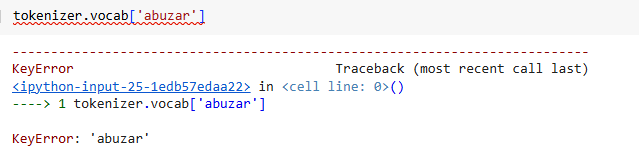

In [69]:
tokenizer('abuzar')

{'input_ids': [1, 534, 3533, 283], 'attention_mask': [1, 1, 1, 1]}

In [70]:
tokenizer.convert_ids_to_tokens(tokenizer('abuzar').input_ids)

['<s>', '▁ab', 'uz', 'ar']

## **freeze > requirements.txt**

In [71]:
!pip list

Package                            Version             Editable project location
---------------------------------- ------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiofiles                           23.2.1
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.14
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.17.0.34.53
astunparse                         1.

In [75]:
import os
os.chdir("/content/")
!pwd

/content


In [76]:
pip freeze > requirements.txt

In [77]:
from google.colab import files
files.download('/content/requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## removing runtime

In [ ]:
# from google.colab import runtime
# runtime.unassign()